In [61]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


In [62]:
from landmarks import FaceLandmarks

In [63]:
class LandmarkEmotionModel(nn.Module):
    def __init__(self,layer_1_size = 64, layer_2_size = 64):
        super().__init__()

        input_dimension = 956  # Amount of mediapipe landmarks/2
        output_size = 1 #(Angry & Not Angry)

        # initialize layers
        self.layer_1 = nn.Linear(input_dimension, layer_1_size)
        self.layer_2 = nn.Linear(layer_1_size, layer_2_size)
        self.output_layer = nn.Linear(layer_2_size, output_size)

        # initialize relu
        self.relu = nn.ReLU()

    def forward_prop(self, x):
        # x = vector of input value; values going thru neural network
        x = self.relu(self.layer_1(x))
        x = self.relu(self.layer_2(x))

        # sigmoid for last layer to obtain continuous result
        x = self.output_layer(x)

        return x


In [64]:
dataset_path = '../data/face_landmarks.csv'
df = pd.read_csv(dataset_path, header=None)
y = df[df.columns[0]]               # Values of the first column (Labels)

x = df.drop(df.columns[0], axis=1)  # Rest of the columns are the features


In [65]:
print(x.shape)

(10402, 956)


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
random_seed = 42

In [68]:
x = x.values
y = y.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=random_seed)

In [69]:
y_train

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [70]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

y_train = torch.FloatTensor(y_train).view(-1, 1)  # Reshape to (batch_size, 1)
y_test = torch.FloatTensor(y_test).view(-1, 1)


In [71]:
y_train

tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [0.],
        [0.]])

# Training the model

In [72]:
# Check if GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [73]:
x_train = x_train.to(device)
y_train = y_train.to(device)

In [74]:
model = LandmarkEmotionModel().to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [75]:
epochs = 1000
losses = []

In [76]:
for i in range(epochs):
    y_pred = model.forward_prop(x_train)
    loss = criterion(y_pred, y_train)

    losses.append(loss.detach().cpu().numpy())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 10 == 0 or i == epochs - 1:
        print(f"Epoch {i}/{epochs} - Loss: {loss.item()}")


Epoch 0/1000 - Loss: 0.9147496819496155
Epoch 10/1000 - Loss: 0.6983371376991272
Epoch 20/1000 - Loss: 0.674964427947998
Epoch 30/1000 - Loss: 0.6658622622489929
Epoch 40/1000 - Loss: 0.6608249545097351
Epoch 50/1000 - Loss: 0.6587399840354919
Epoch 60/1000 - Loss: 0.6569276452064514
Epoch 70/1000 - Loss: 0.6547157764434814
Epoch 80/1000 - Loss: 0.6526218056678772
Epoch 90/1000 - Loss: 0.6505730748176575
Epoch 100/1000 - Loss: 0.6484687328338623
Epoch 110/1000 - Loss: 0.6462893486022949
Epoch 120/1000 - Loss: 0.6440081000328064
Epoch 130/1000 - Loss: 0.6416066288948059
Epoch 140/1000 - Loss: 0.6390759944915771
Epoch 150/1000 - Loss: 0.6364235281944275
Epoch 160/1000 - Loss: 0.6336342096328735
Epoch 170/1000 - Loss: 0.6307114958763123
Epoch 180/1000 - Loss: 0.6276652216911316
Epoch 190/1000 - Loss: 0.62446129322052
Epoch 200/1000 - Loss: 0.6210377812385559
Epoch 210/1000 - Loss: 0.61552494764328
Epoch 220/1000 - Loss: 0.6142721176147461
Epoch 230/1000 - Loss: 0.6077097654342651
Epoch 24

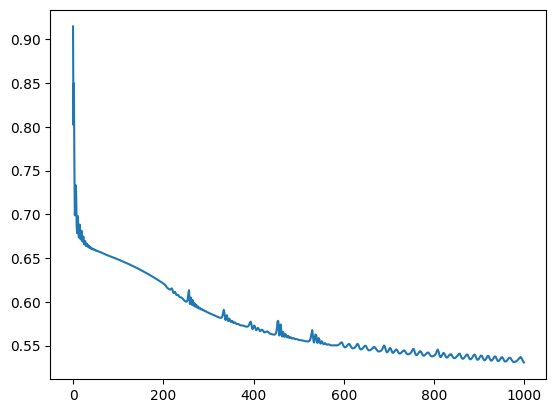

In [77]:
plt.plot(range(epochs), losses)